In [1]:
# import libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import itertools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# import data using pandas

data = pd.read_csv('data/dataset.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values



### Preprocessing

In [3]:
# Splitting the data into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)




In [4]:
# imputation

from sklearn.preprocessing import Imputer
imputer = Imputer()

""" 
OR

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer()
"""



X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)



In [5]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




### Classification

In [6]:
# Use any two classifiers
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)



             precision    recall  f1-score   support

          0       0.98      0.95      0.97        66
          1       0.92      0.97      0.95        37

avg / total       0.96      0.96      0.96       103



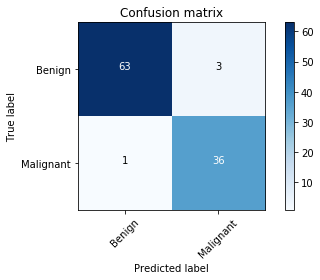

In [7]:
# print or plot  metrics / results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# metrics
print(classification_report(y_test,y_pred))



# confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
classes = ['Benign', 'Malignant']
fig = plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
normalize = False
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()



In [8]:
# Part two : 
# Let’s say you have achieved an accuracy score xx% depending on your choice of
# classifier. Do you think it is a good score? If yes, what did you compare with?


# dummy
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy_y_pred = dummy.predict(X_test)
dummy_accuracy = accuracy_score(y_test, dummy_y_pred)

# compare dummy and real classifiers
real_accuracy = accuracy_score(y_test, y_pred)
print("\nDummy accuracy: ", dummy_accuracy)
print("Real accuracy: ", real_accuracy)


#Also other possible solutions  discussed in Tutorial session











Dummy accuracy:  0.5339805825242718
Real accuracy:  0.9611650485436893
